##Common Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from scipy.stats import zscore

##Associate Google Colab with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Data

In [3]:
# Load the dataset (Update the file path accordingly)
df = pd.read_csv('/content/drive/MyDrive/Avocado/Avocado.csv')

##DataFrame properties

In [4]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


##Viewing Data

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Display basic information
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  


In [7]:
# Display basic information
print(df.shape)

(18249, 13)


## Handling missing values


In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [9]:
# This is just another version of the checking null values(it is the same meaning the code that situated in above part.)
df.isnull().values.any()

np.False_

In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## Statistical informations

In [11]:
# Descriptive statistics
print("\nDescriptive Statistics:")
features = df.select_dtypes(include=[np.number])
avocado_statistics = features.describe()
avocado_statistics


Descriptive Statistics:


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


##Checking Unique Values and Standardizing Date Format

In [12]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = [col for col in ['type', 'year', 'Region'] if col in df.columns]
print(df[categorical_columns].nunique())


Unique values in categorical columns:
type    2
year    4
dtype: int64


# Data visualization with matplotlib

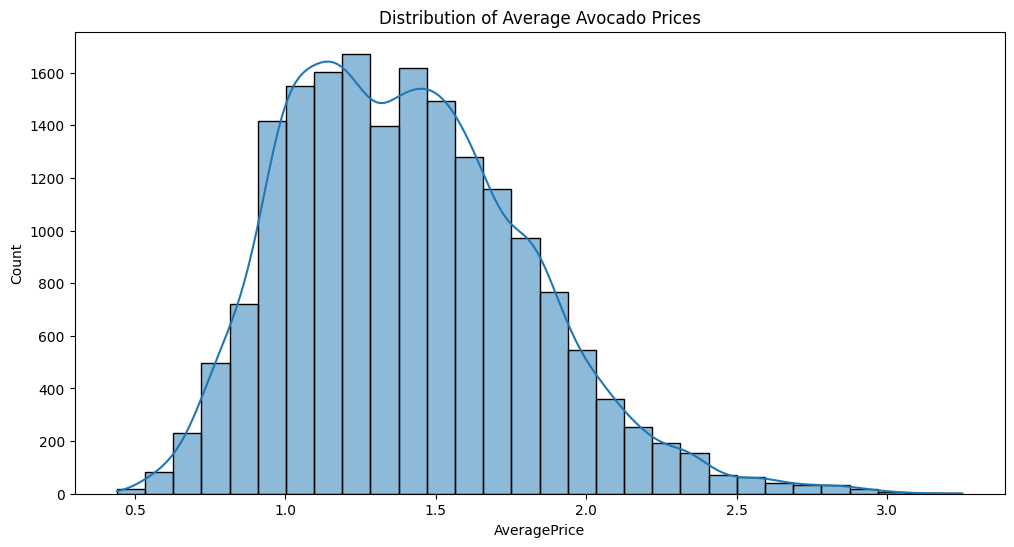

In [14]:
# Histogram of the Average Avocado Prices
plt.figure(figsize=(12,6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Avocado Prices')
plt.show()

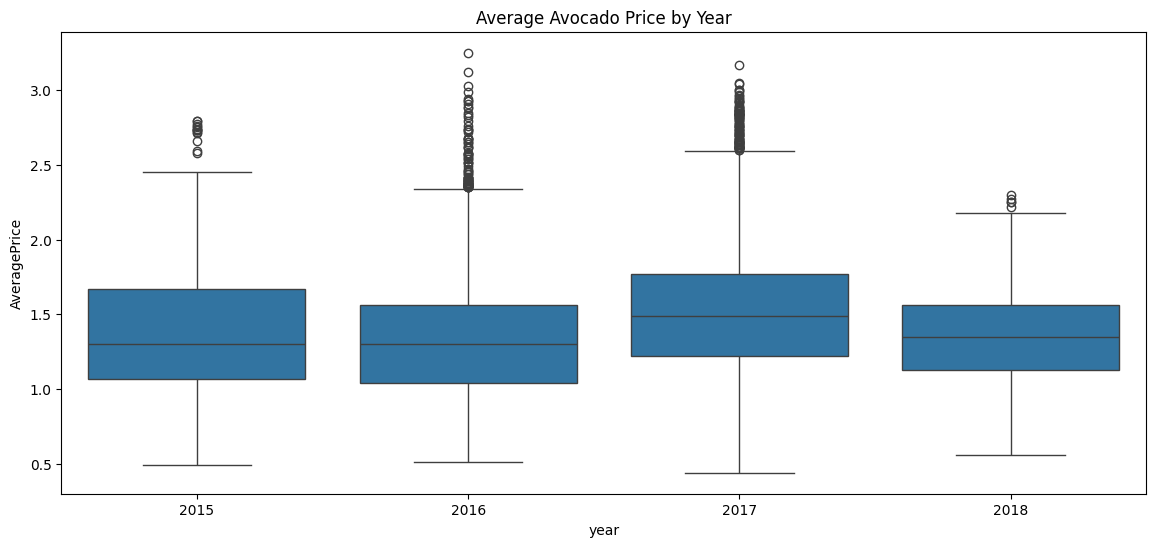

In [15]:
# Boxplot of the Avg.Avocado Price by Year
plt.figure(figsize=(14,6))
sns.boxplot(x='year', y='AveragePrice', data=df)
plt.title('Average Avocado Price by Year')
plt.show()

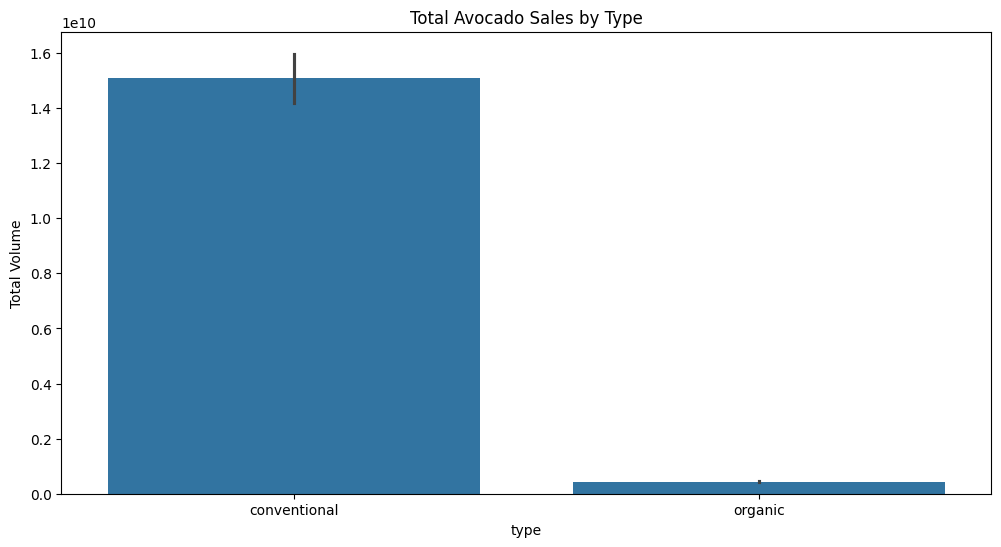

In [16]:
# Barplot of the Total Avocado Sales by Type
plt.figure(figsize=(12,6))
sns.barplot(x='type', y='Total Volume', data=df, estimator=np.sum)
plt.title('Total Avocado Sales by Type')
plt.show()

<Axes: xlabel='year', ylabel='region'>

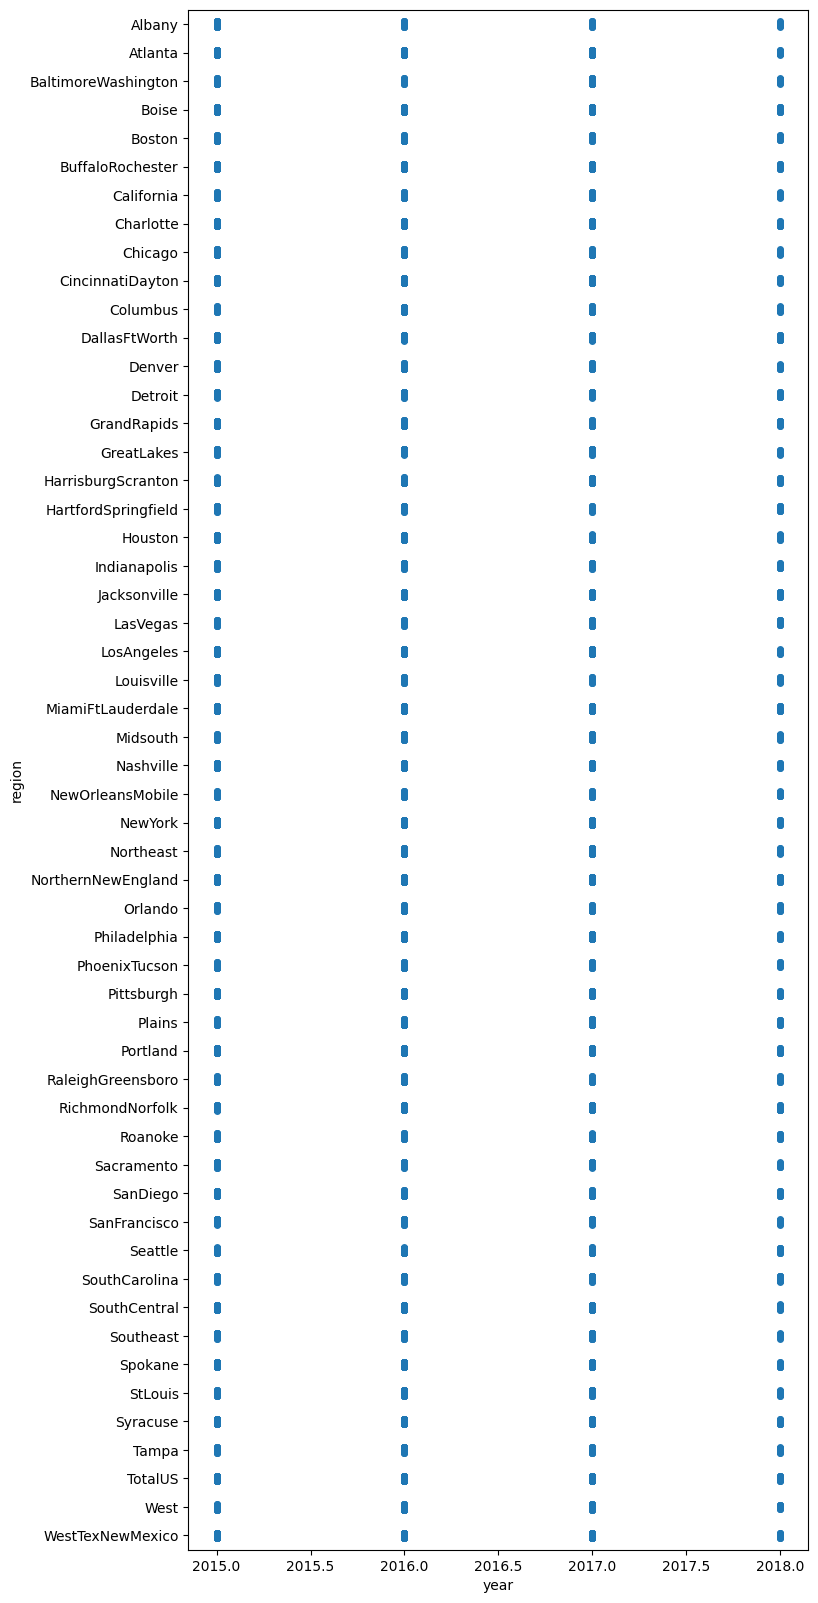

In [17]:
# Strip Plot - 1
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

<Axes: xlabel='year', ylabel='AveragePrice'>

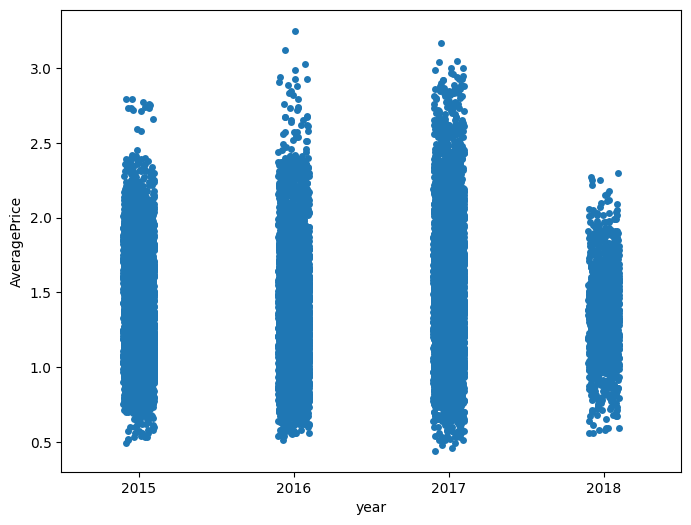

In [18]:
# Strip Plot - 2
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

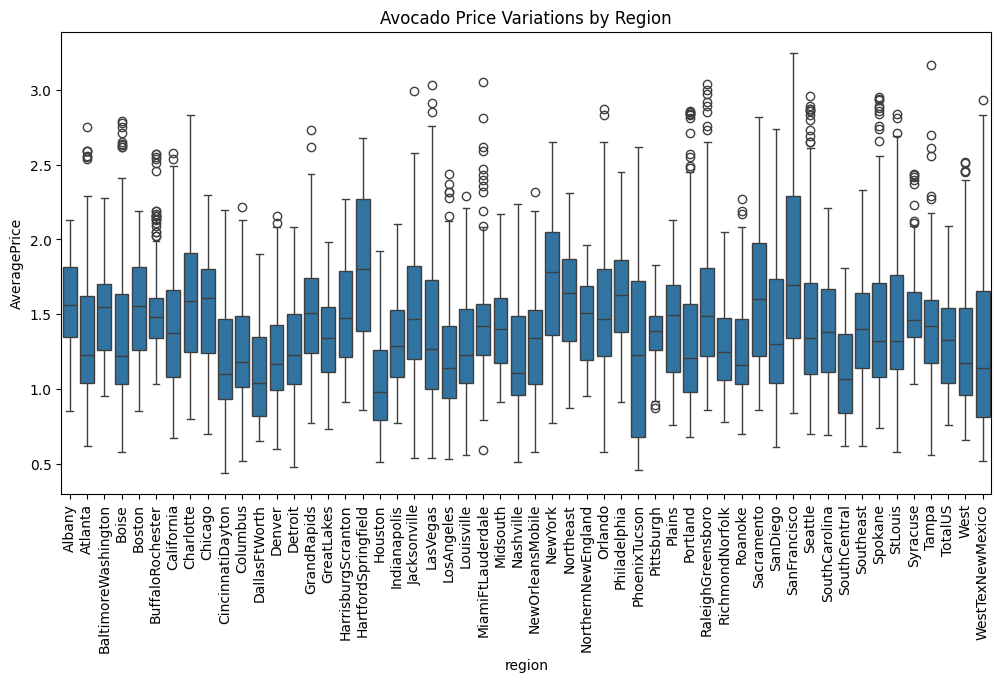

In [19]:
# Boxplot of price variations across regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.title('Avocado Price Variations by Region')
plt.show()

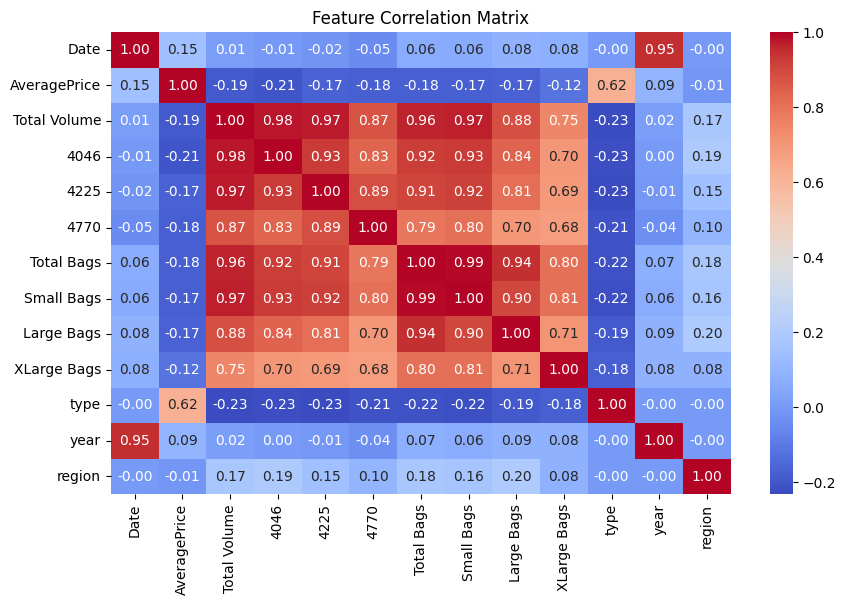

In [20]:
df_encoded = df.copy()
df_encoded['type'] = df_encoded['type'].astype('category').cat.codes
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes

# Compute correlation matrix on the encoded data
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

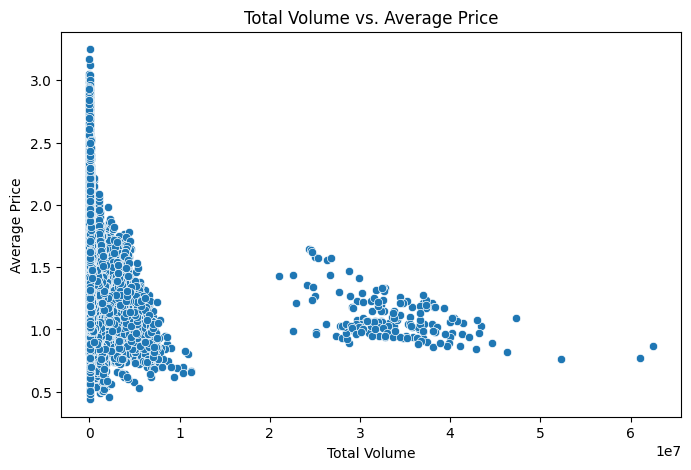

In [21]:
# Pairwise scatter plot (Total Volume vs. Price)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total Volume'], y=df['AveragePrice'])
plt.title('Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

# M2: Data Preparation(Processing)

# Feature Engineering



In [22]:
# Extracting features new features from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Create New Features

In [23]:
# Creating 5 new features
df['Total_PLU_Sales'] = df['4046'] + df['4225'] + df['4770']
df['PLU_4046_Ratio'] = df['4046'] / df['Total Volume']
df['PLU_4225_Ratio'] = df['4225'] / df['Total Volume']
df['PLU_4770_Ratio'] = df['4770'] / df['Total Volume']
df['Price_per_Volume'] = df['AveragePrice'] / df['Total Volume']

# One-Hot Encode

In [24]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

# Improving Data Quality

In [25]:
# Handle infinite values (from division operations) (it drops infinite values.)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print("Step 1: Data loaded and prepared successfully!")

Step 1: Data loaded and prepared successfully!


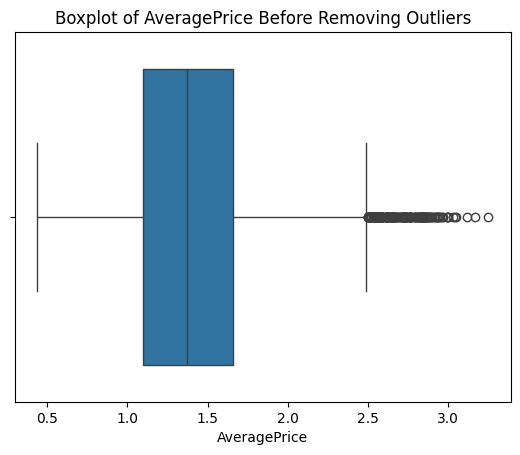

In [26]:
sns.boxplot(x=df['AveragePrice'])
plt.title("Boxplot of AveragePrice Before Removing Outliers")
plt.show() # FEEDBACK - 2

In [27]:
z_scores = np.abs(zscore(df['AveragePrice']))
print(f"Outliers detected: {(z_scores > 3).sum()} out of {len(df)} rows") # FEEDBACK - 1

Outliers detected: 131 out of 18249 rows


In [28]:
# Outlier Removal using Z-score(the smallest and the largest)
df = df[(np.abs(zscore(df['AveragePrice'])) < 3)]  # Remove extreme price outliers FEEDBACK - 2

# Correlation Matrix

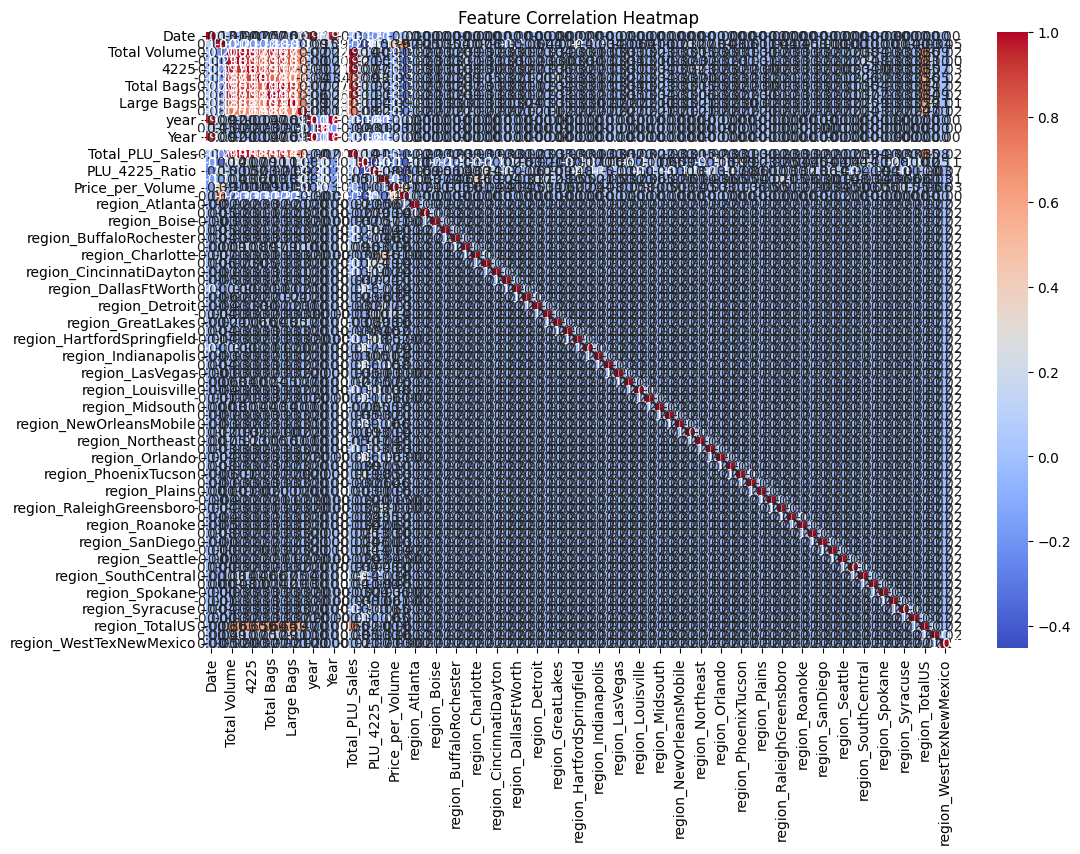

In [29]:
# Compute correlation matrix (it can be between 0-1, if it's close to 1, then we will know that, it will be useful for us.
# The closer the value is to 1, the better. Drop the low values).
# Red positive, Blue negative.
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
# Show correlation with 'AveragePrice'
# Which factors effects to the averagePrice.
# Ascending order.The most useful factor for us is type_organic.
# The most not useful ones are negatives.

correlation_with_price = correlation_matrix["AveragePrice"].sort_values(ascending=False)
print("Correlation with AveragePrice:\n", correlation_with_price)

Correlation with AveragePrice:
 AveragePrice        1.000000
type_organic        0.620399
Price_per_Volume    0.387116
Month               0.154308
PLU_4225_Ratio      0.149266
                      ...   
Total Volume       -0.195337
Total_PLU_Sales    -0.197795
4046               -0.211944
PLU_4046_Ratio     -0.346799
Weekday                  NaN
Name: AveragePrice, Length: 73, dtype: float64


# Improving Data Quality (Again)

In [31]:
# Drop redundant features
df.drop(columns=['Total_PLU_Sales'], inplace=True)

# You can drop the others also. It's up to us.
# For example like this -> df.drop(columns=['Weekday'], inplace=True)....

In [32]:
df.drop(columns=['Date'], inplace=True)

# Distribution of AveragePrice

In [33]:
# Define target and features
# It means that, we are defining target and features, so X is feature, Y is target.
# Then, our features are everything except averagePrice.
# Our target is Y and It's averagePrice.
X = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

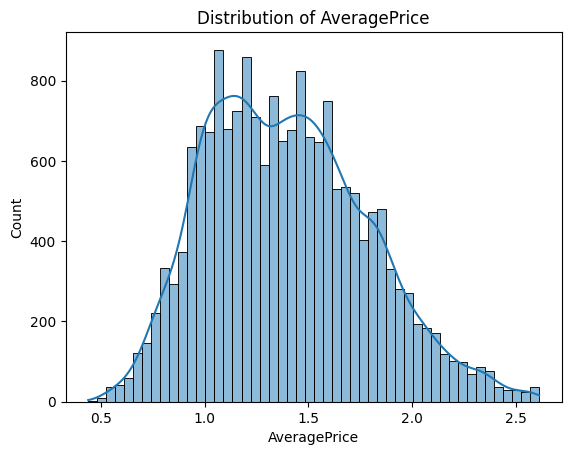

In [34]:
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of AveragePrice")
plt.show()

# Preparing for Train Part

In [35]:
# Train/Test Split (After Checking Distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18118 entries, 0 to 18248
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                18118 non-null  float64
 1   Total Volume                18118 non-null  float64
 2   4046                        18118 non-null  float64
 3   4225                        18118 non-null  float64
 4   4770                        18118 non-null  float64
 5   Total Bags                  18118 non-null  float64
 6   Small Bags                  18118 non-null  float64
 7   Large Bags                  18118 non-null  float64
 8   XLarge Bags                 18118 non-null  float64
 9   year                        18118 non-null  int64  
 10  Month                       18118 non-null  int32  
 11  Year                        18118 non-null  int32  
 12  Weekday                     18118 non-null  int32  
 13  PLU_4046_Ratio              18118 no

In [37]:
# Standardize features
scaler = StandardScaler() # Create an instance of StandardScaler
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test) # Transform test data using the same scaler

# Train with Random Forest Regression Model

In [38]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42) # Create a Random Forest model
rf.fit(X_train_scaled, y_train) # Train the model on the standardized training data

RandomForestRegressor(random_state=42)

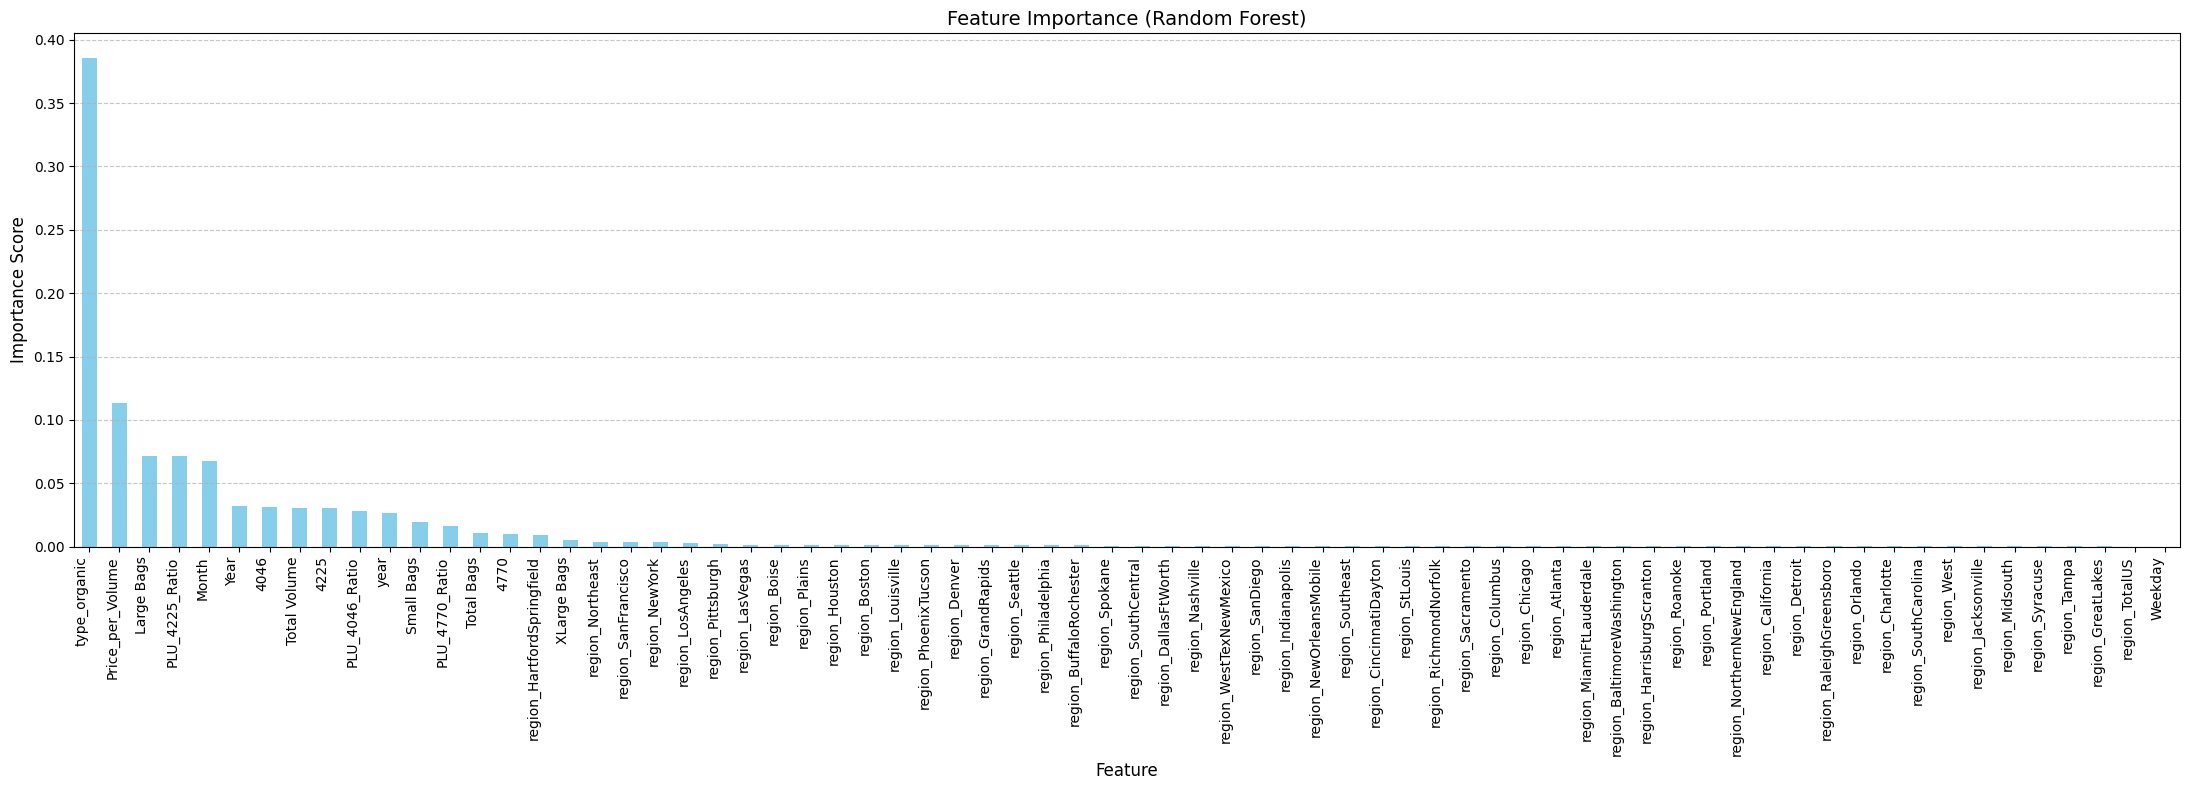

In [39]:
# Feature Importance (Random Forest)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(22, 8))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Train with Lasso Regression Model

In [40]:
# Train Lasso Regression for Feature Selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

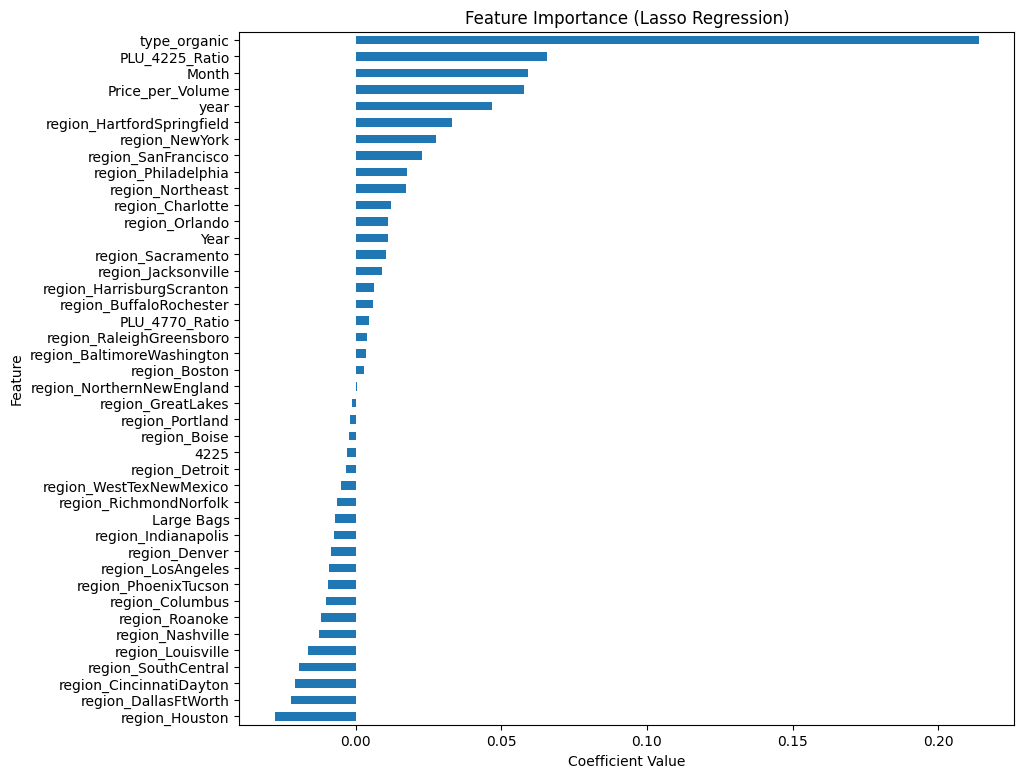

In [41]:
# Extract Important Features from Lasso
lasso_importance = pd.Series(lasso.coef_, index=X.columns)
plt.figure(figsize=(10, 9))
lasso_importance[lasso_importance != 0].sort_values().plot(kind='barh')
plt.title("Feature Importance (Lasso Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Saving the Final Avocado Dataset

In [42]:
# Keep Only Selected Features
selected_features = lasso_importance[lasso_importance != 0].index.tolist()
df_selected = df[selected_features + ["AveragePrice"]]

# Save Processed Dataset
df_selected.to_csv("final_avocado_data.csv", index=False)
print("Final dataset saved as 'final_avocado_data.csv'!")

Final dataset saved as 'final_avocado_data.csv'!


# M3: Model Creation

# Importing Libraries

In [43]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create a Proper Baseline Model

In [44]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train_scaled, y_train)
y_pred_baseline = baseline.predict(X_test_scaled)

print("Baseline Model - Mean Squared Error:", mean_squared_error(y_test, y_pred_baseline))
print("Baseline Model - R^2 Score:", r2_score(y_test, y_pred_baseline))

Baseline Model - Mean Squared Error: 0.1466236973748126
Baseline Model - R^2 Score: -4.188534740845462e-05


# Define, Train and Predict Models

In [45]:
# Define models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the models
linear_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)

# Evaluate the performance of the models
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation Metrics mean_squared_error (MSE) and r2_score (R²)

print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_linear))

print("Ridge Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression - R^2 Score:", r2_score(y_test, y_pred_ridge))

print("Gradient Boosting Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))
print("Gradient Boosting Regression - R^2 Score:", r2_score(y_test, y_pred_gbr))

print("Support Vector Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regression - R^2 Score:", r2_score(y_test, y_pred_svr))

Linear Regression - Mean Squared Error: 0.04953989916889266
Linear Regression - R^2 Score: 0.6621148214661624
Ridge Regression - Mean Squared Error: 0.04955727559854166
Ridge Regression - R^2 Score: 0.6619963061253415
Gradient Boosting Regression - Mean Squared Error: 0.029617912863679607
Gradient Boosting Regression - R^2 Score: 0.7979920439154232
Support Vector Regression - Mean Squared Error: 0.022291293595888287
Support Vector Regression - R^2 Score: 0.8479629986585364


# Visualization of the Model Performances

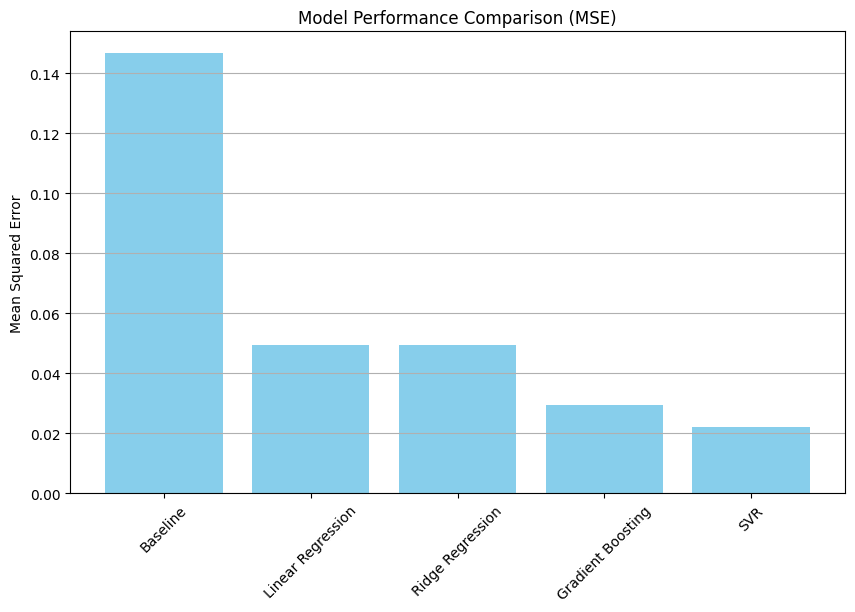

In [46]:
mse_scores = {
    'Baseline': mean_squared_error(y_test, y_pred_baseline),
    'Linear Regression': mean_squared_error(y_test, y_pred_linear),
    'Ridge Regression': mean_squared_error(y_test, y_pred_ridge),
    'Gradient Boosting': mean_squared_error(y_test, y_pred_gbr),
    'SVR': mean_squared_error(y_test, y_pred_svr),
}

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison (MSE)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Cross-Validation of Trained Models

In [47]:
from sklearn.model_selection import cross_val_score

# Evaluate the performance of Random Forest with cross validation
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_rf = np.sqrt(-rf_scores)
print("Random Forest RMSE (Cross-Validation):", rmse_scores_rf.mean())

# You can also cross-validate for other models
gbr_scores = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gbr = np.sqrt(-gbr_scores)
print("Gradient Boosting Regression RMSE (Cross-Validation):", rmse_scores_gbr.mean())

Random Forest RMSE (Cross-Validation): 0.10604657273537428
Gradient Boosting Regression RMSE (Cross-Validation): 0.17268687950600903


# RMSE Visualization

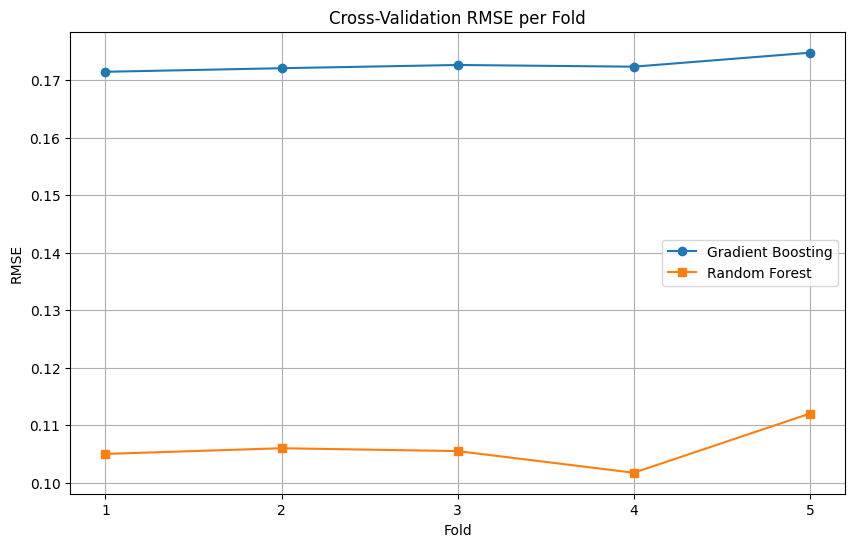

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,6), rmse_scores_gbr, marker='o', label='Gradient Boosting')
plt.plot(range(1,6), rmse_scores_rf, marker='s', label='Random Forest')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE per Fold')
plt.xticks(range(1,6))
plt.legend()
plt.grid(True)
plt.show()

# Perform Hyperparameter-Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter range for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Find the best hyperparameters with GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_gbr = grid_search.best_estimator_

# Evaluate the performance of the best model on the test set
y_pred_best_gbr = best_gbr.predict(X_test_scaled)
print("Best Gradient Boosting Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_best_gbr))
print("Best Gradient Boosting Regression - R^2 Score:", r2_score(y_test, y_pred_best_gbr))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Gradient Boosting Regression - Mean Squared Error: 0.005595607758617165
Best Gradient Boosting Regression - R^2 Score: 0.9618353497232612


# Visualization of Actual vs Predicted Average Price

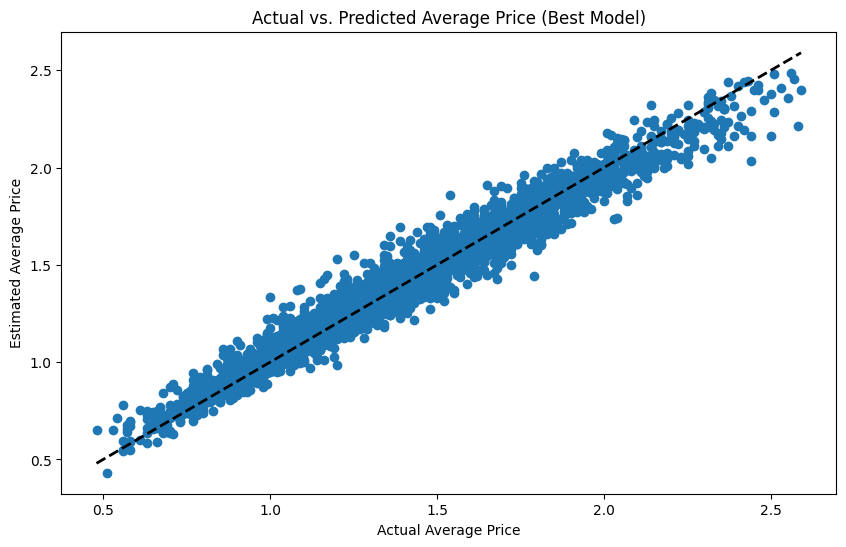

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gbr)
plt.xlabel("Actual Average Price")
plt.ylabel("Estimated Average Price")
plt.title("Actual vs. Predicted Average Price (Best Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Perfect forecast line
plt.show()

# M4: Further Improvements

# Importing Libraries

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# Feature Engineering

In [52]:
if 'AveragePrice' in df.columns:
    df['high_price'] = (df['AveragePrice'] > 1.5).astype(int)

if 'AveragePrice' in df.columns and 'Total Volume' in df.columns:
    df['price_per_total_volume'] = df['AveragePrice'] / (df['Total Volume'] + 1e-5)

# Log transform numeric columns if present
for col in ['4046', '4225', '4770', 'Total Volume']:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col])

# One-hot encode categorical columns if they exist
for col in ['region', 'type']:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Drop AveragePrice if still exists
if 'AveragePrice' in df.columns:
    df.drop('AveragePrice', axis=1, inplace=True)

# Train/Test Split & Scaling

In [53]:
X = df.drop('high_price', axis=1)
y = df['high_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Direction 1 - Advanced Modelling (XGBoost + GridSearchCV)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2261
           1       0.91      0.91      0.91      1363

    accuracy                           0.93      3624
   macro avg       0.93      0.93      0.93      3624
weighted avg       0.93      0.93      0.93      3624



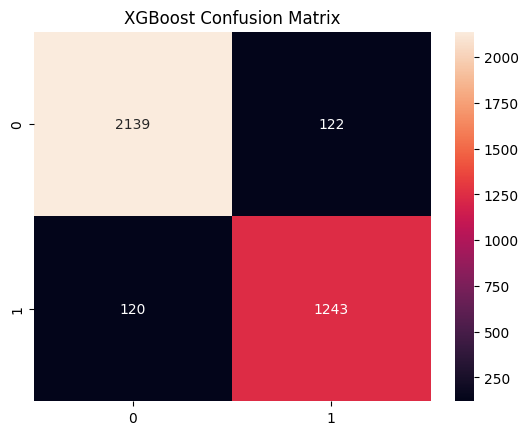

In [54]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1', verbose=0)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
y_pred_xgb = best_model.predict(X_test_scaled)

print("\nBest Parameters:", grid.best_params_)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Direction 2 - Light GBM Model & SMOTE

[LightGBM] [Info] Number of positive: 9076, number of negative: 9076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4824
[LightGBM] [Info] Number of data points in the train set: 18152, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Classification Report (LightGBM + SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2261
           1       0.94      0.96      0.95      1363

    accuracy                           0.96      3624
   macro avg       0.96      0.96      0.96      3624
weighted avg       0.96      0.96      0.96      3624



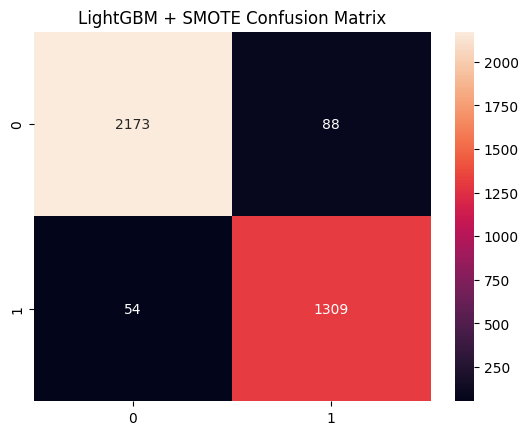

LightGBM + SMOTE - Accuracy: 0.961, F1: 0.949


In [55]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train with LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_lgbm = lgbm.predict(X_test_scaled)

print("\nClassification Report (LightGBM + SMOTE):")
print(classification_report(y_test, y_pred_lgbm))

sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')
plt.title("LightGBM + SMOTE Confusion Matrix")
plt.show()

print(f"LightGBM + SMOTE - Accuracy: {accuracy_score(y_test, y_pred_lgbm):.3f}, F1: {f1_score(y_test, y_pred_lgbm):.3f}")

# Compare Model Performances

In [56]:
print(f"XGBoost - Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}, F1: {f1_score(y_test, y_pred_xgb):.3f}")
print(f"Light GBM + SMOTE - Accuracy: {accuracy_score(y_test, y_pred_lgbm):.3f}, F1: {f1_score(y_test, y_pred_lgbm):.3f}")

XGBoost - Accuracy: 0.933, F1: 0.911
Light GBM + SMOTE - Accuracy: 0.961, F1: 0.949


# Comparing with Previous Milestone's Results

In [57]:
# M3 Regression Models and Predictions
regression_models = {
    "Linear Regression": (linear_reg, y_pred_linear),
    "Ridge Regression": (ridge_reg, y_pred_ridge),
    "Gradient Boosting": (gbr, y_pred_gbr),
    "SVR": (svr, y_pred_svr)
}

print("Milestone 3 — Regression Results")
for name, (model, preds) in regression_models.items():
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name:<25} | R²: {r2:.3f} | RMSE: {rmse:.3f}")

Milestone 3 — Regression Results
Linear Regression         | R²: -3.959 | RMSE: 1.079
Ridge Regression          | R²: -3.960 | RMSE: 1.079
Gradient Boosting         | R²: -3.889 | RMSE: 1.071
SVR                       | R²: -3.825 | RMSE: 1.064


In [58]:
# M4 Classification Predictions
classification_models = {
    "XGBoost Classifier": y_pred_xgb
}

print("Milestone 4 — Classification Results")
for name, preds in classification_models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"{name:<30} | Accuracy: {acc:.3f} | F1 Score: {f1:.3f}")


classification_models = {
    "LightGBM + SMOTE": y_pred_lgbm
}

print("Milestone 4 — Classification Results")
for name, preds in classification_models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"{name:<30} | Accuracy: {acc:.3f} | F1 Score: {f1:.3f}")

Milestone 4 — Classification Results
XGBoost Classifier             | Accuracy: 0.933 | F1 Score: 0.911
Milestone 4 — Classification Results
LightGBM + SMOTE               | Accuracy: 0.961 | F1 Score: 0.949


# Visualizations

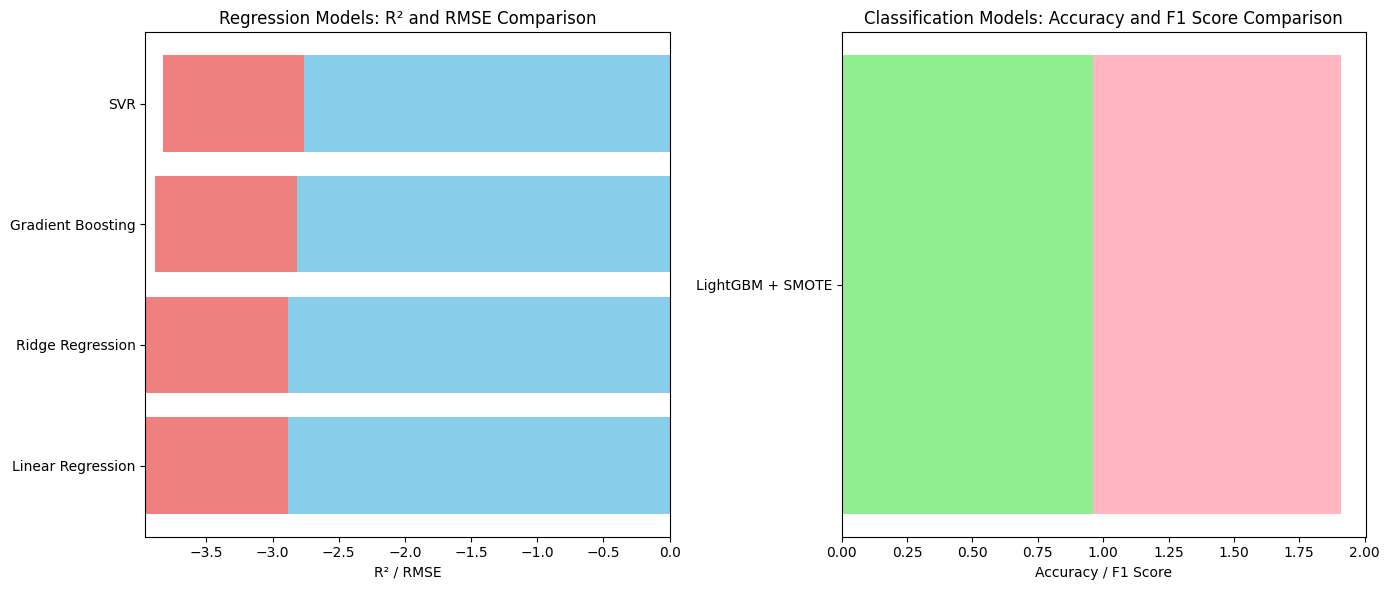

In [59]:
# Data for regression models (R² and RMSE)
regression_models = {
    "Linear Regression": (-3.959, 1.079),
    "Ridge Regression": (-3.960, 1.079),
    "Gradient Boosting": (-3.889, 1.071),
    "SVR": (-3.825, 1.064)
}

# Data for classification models (Accuracy and F1 Score)
classification_models = {
    "XGBoost Classifier": (0.933, 0.911)
}
classification_models = {
    "LightGBM + SMOTE": (accuracy_score(y_test, y_pred_lgbm), f1_score(y_test, y_pred_lgbm))
}

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Regression model performance chart
regression_names = list(regression_models.keys())
r2_values = [val[0] for val in regression_models.values()]
rmse_values = [val[1] for val in regression_models.values()]

# Plot R² values for regression models
ax1.barh(regression_names, r2_values, color='skyblue', label='R²')
ax1.set_xlabel('R²')
ax1.set_title('Regression Models: R² Comparison')

# Plot RMSE values for regression models
ax1.barh(regression_names, rmse_values, left=r2_values, color='lightcoral', label='RMSE')
ax1.set_xlabel('R² / RMSE')
ax1.set_title('Regression Models: R² and RMSE Comparison')

# Classification model performance chart
classification_names = list(classification_models.keys())
accuracy_values = [val[0] for val in classification_models.values()]
f1_values = [val[1] for val in classification_models.values()]

# Plot Accuracy values for classification models
ax2.barh(classification_names, accuracy_values, color='lightgreen', label='Accuracy')
ax2.set_xlabel('Accuracy')
ax2.set_title('Classification Models: Accuracy Comparison')

# Plot F1 Score values for classification models
ax2.barh(classification_names, f1_values, left=accuracy_values, color='lightpink', label='F1 Score')
ax2.set_xlabel('Accuracy / F1 Score')
ax2.set_title('Classification Models: Accuracy and F1 Score Comparison')

# Show the chart
plt.tight_layout()
plt.show()